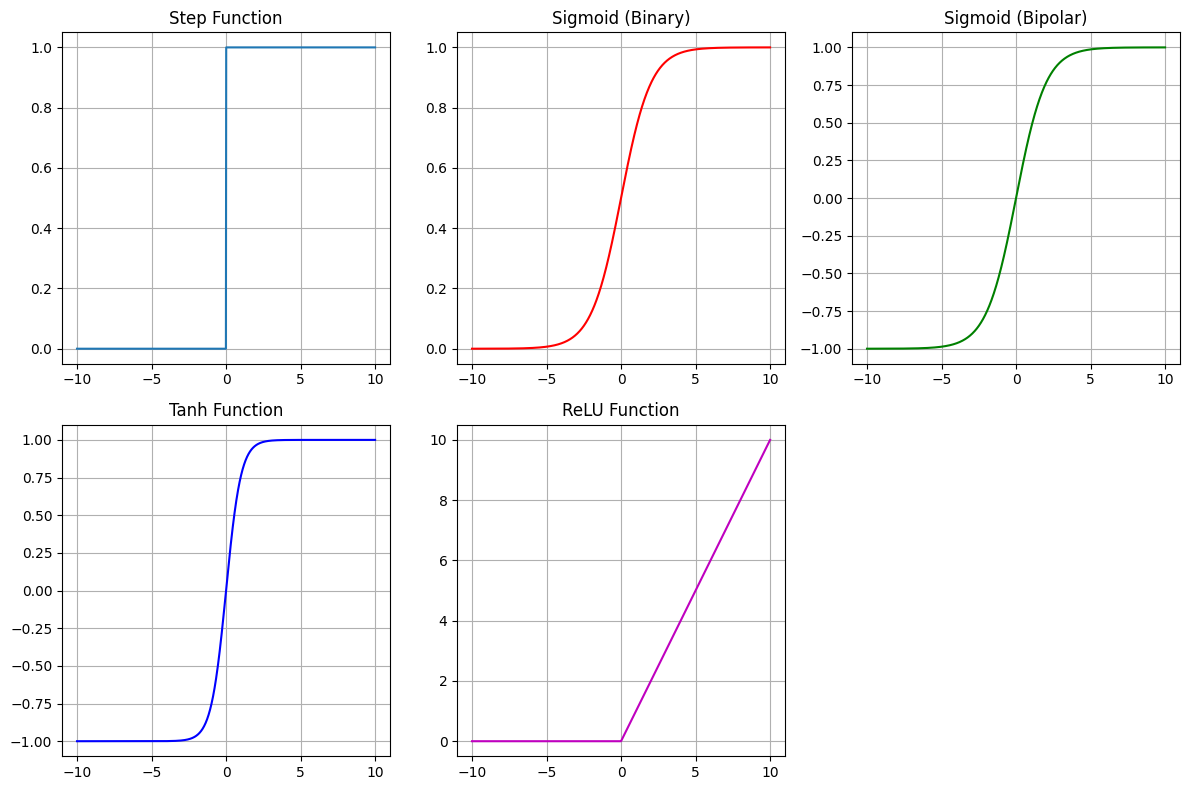

In [2]:
# Lab Task 1: Implement and Visualize Activation Functions
import numpy as np
import matplotlib.pyplot as plt

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary)
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar)
def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

# Visualize the functions
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 8))

# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x), label="Step Function")
plt.title("Step Function")
plt.grid()

# Sigmoid Binary
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_binary(x), label="Sigmoid (Binary)", color='r')
plt.title("Sigmoid (Binary)")
plt.grid()

# Sigmoid Bipolar
plt.subplot(2, 3, 3)
plt.plot(x, sigmoid_bipolar(x), label="Sigmoid (Bipolar)", color='g')
plt.title("Sigmoid (Bipolar)")
plt.grid()

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x), label="Tanh Function", color='b')
plt.title("Tanh Function")
plt.grid()

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu_function(x), label="ReLU Function", color='m')
plt.title("ReLU Function")
plt.grid()

plt.tight_layout()
plt.show()


In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


In [5]:
def build_and_train_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=100, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X, y, verbose=0)
    print(f'Activation: {activation_function}, Accuracy: {accuracy * 100:.2f}%')

# Train the network with different activation functions
for activation in ['sigmoid', 'tanh', 'relu']:
    build_and_train_model(activation)


Activation: sigmoid, Accuracy: 25.00%


Activation: tanh, Accuracy: 50.00%


Activation: relu, Accuracy: 100.00%


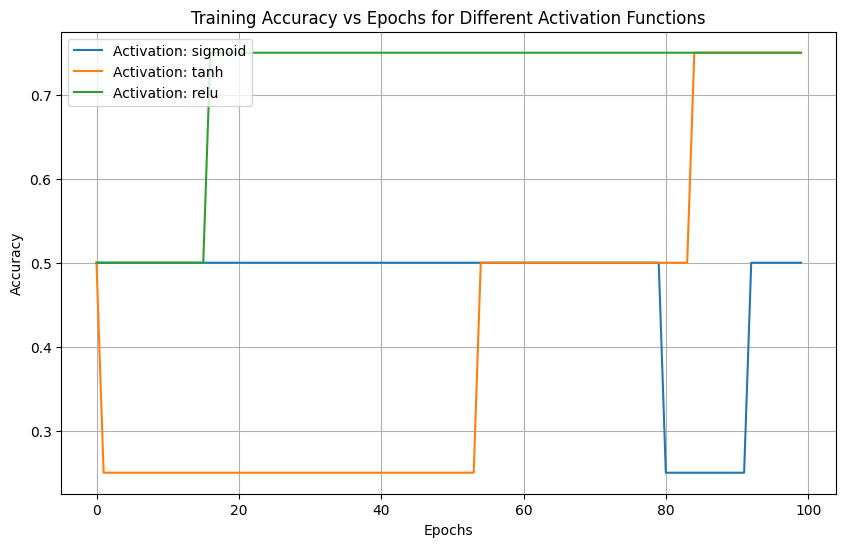

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Function to build and train the model, returning the accuracy for each epoch
def build_and_train_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model and record accuracy for each epoch
    history = model.fit(X, y, epochs=100, verbose=0)

    # Return accuracy for each epoch
    return history.history['accuracy']

# Store accuracy results for each activation function
activation_functions = ['sigmoid', 'tanh', 'relu']
accuracy_results = {}

# Train the model for each activation function and store the accuracy
for activation in activation_functions:
    accuracy_results[activation] = build_and_train_model(activation)

# Plot the accuracy results
plt.figure(figsize=(10, 6))

# Loop through each activation function and plot its accuracy over epochs
for activation, accuracy in accuracy_results.items():
    plt.plot(accuracy, label=f'Activation: {activation}')

# Adding plot details
plt.title('Training Accuracy vs Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
